# TRABAJO UT7: AGRUPACIÓN

In [ ]:
# Se monta el drive en el colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Preparamos el entorno
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importamos el csv
ruta = '/content/drive/MyDrive/CSVs/ObesityDataSet.csv'
data = pd.read_csv(ruta,
                      header=0,
                      sep=",",
                      decimal=".",
                      quotechar="\"",
                      encoding='utf-8',
)
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
data = data.drop('NObeyesdad', axis=1)

Voy a eliminar la columna que nos dice el grupo al que pertenecen, y a partir de aquí voy a agruparlos mediante los distintos algoritmos.

#VALORES MISSING

In [ ]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

#VARIABLES DUMMY

In [ ]:
data = pd.get_dummies(data, columns=['Gender','family_history_with_overweight', 'SMOKE', 'SCC','FAVC'])
data.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,FAVC_no,FAVC_yes
0,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,no,...,1,0,0,1,1,0,1,0,1,0
1,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,Sometimes,...,1,0,0,1,0,1,0,1,1,0
2,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,Frequently,...,0,1,0,1,1,0,1,0,1,0
3,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,Frequently,...,0,1,1,0,1,0,1,0,1,0
4,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,Sometimes,...,0,1,1,0,1,0,1,0,1,0


In [ ]:
data = data.drop(['Gender_Female','family_history_with_overweight_no','SMOKE_no','SCC_no', 'FAVC_no'], axis=1)

In [ ]:
label_encoder = LabelEncoder()


data['CAEC'] = label_encoder.fit_transform(data['CAEC'])
data['CALC'] = label_encoder.fit_transform(data['CALC'])
data['MTRANS'] = label_encoder.fit_transform(data['MTRANS'])
data['MTRANS'] = label_encoder.fit_transform(data['MTRANS'])

data.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,SCC_yes,FAVC_yes
0,21.0,1.62,64.0,2.0,3.0,2,2.0,0.0,1.0,3,3,0,1,0,0,0
1,21.0,1.52,56.0,3.0,3.0,2,3.0,3.0,0.0,2,3,0,1,1,1,0
2,23.0,1.80,77.0,2.0,3.0,2,2.0,2.0,1.0,1,3,1,1,0,0,0
3,27.0,1.80,87.0,3.0,3.0,2,2.0,2.0,0.0,1,4,1,0,0,0,0
4,22.0,1.78,89.8,2.0,1.0,2,2.0,0.0,0.0,2,3,1,0,0,0,0


<ipython-input-10-970c29e40805>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c], hist = True, kde = True, ax = ax[i,j])
<ipython-input-10-970c29e40805>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c], hist = True, kde = True, ax = ax[i,j])
<ipython-input-10-970c29e40805>:8: Use

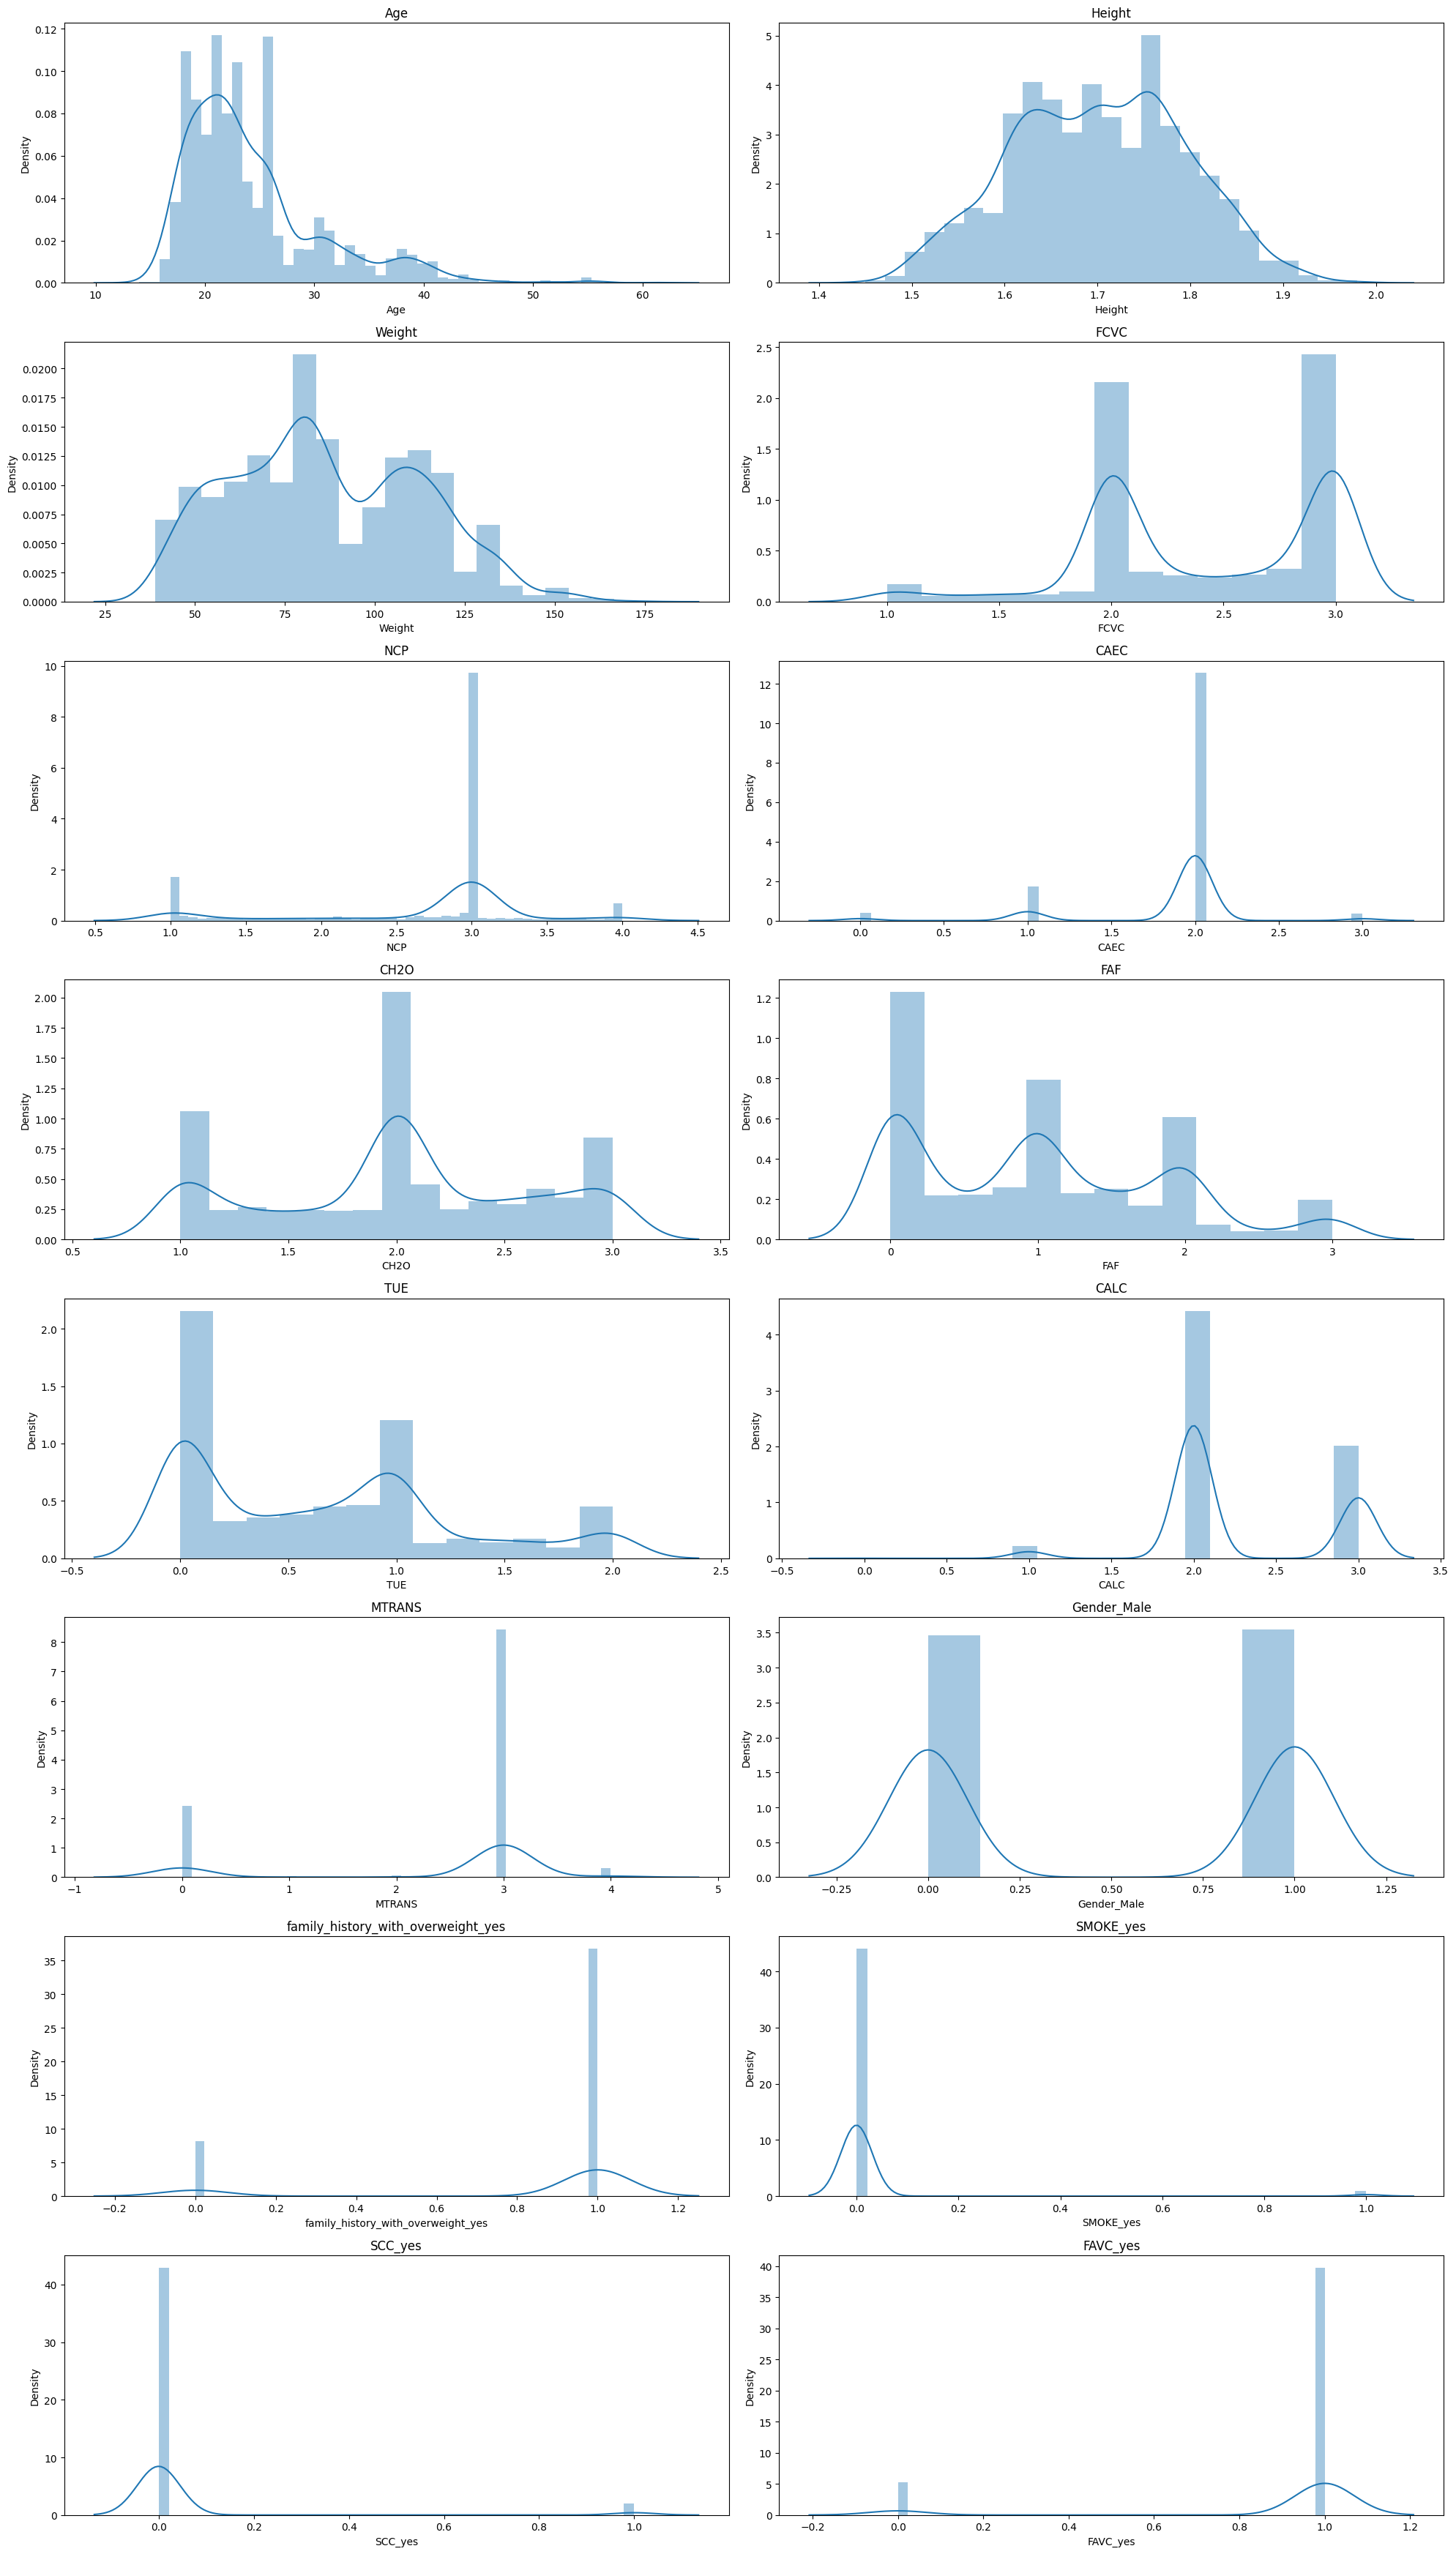

In [ ]:
cols = data.columns

fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols = 2, figsize = (20, 35))

i,j = 0,0
for c in cols:

  sns.distplot(data[c], hist = True, kde = True, ax = ax[i,j])

  ax[i,j].set_title(c)

  j+=1
  if j==2:
      i+=1
      j=0

plt.tight_layout()

#NORMALICIÓN

In [ ]:
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------Age------
Skewness: 1.529100
Kurtosis: 2.826389
------Height------
Skewness: -0.012855
Kurtosis: -0.562949
------Weight------
Skewness: 0.255410
Kurtosis: -0.699898
------FCVC------
Skewness: -0.432906
Kurtosis: -0.637546
------NCP------
Skewness: -1.107097
Kurtosis: 0.385527
------CAEC------
Skewness: -1.907526
Kurtosis: 5.401802
------CH2O------
Skewness: -0.104912
Kurtosis: -0.879395
------FAF------
Skewness: 0.498490
Kurtosis: -0.620588
------TUE------
Skewness: 0.618502
Kurtosis: -0.548660
------CALC------
Skewness: 0.236481
Kurtosis: -0.325943
------MTRANS------
Skewness: -1.280169
Kurtosis: -0.191592
------Gender_Male------
Skewness: -0.023704
Kurtosis: -2.001335
------family_history_with_overweight_yes------
Skewness: -1.646216
Kurtosis: 0.710699
------SMOKE_yes------
Skewness: 6.712867
Kurtosis: 43.103425
------SCC_yes------
Skewness: 4.366270
Kurtosis: 17.080496
------FAVC_yes------
Skewness: -2.399125
Kurtosis: 3.759363


In [ ]:
columns_to_normalize = ['FAVC_yes', 'SCC_yes', 'SMOKE_yes', 'CAEC']


In [ ]:
data[columns_to_normalize] = data[columns_to_normalize].apply(lambda x: x + 1e-10 if x.min() == 0 else x)
data[columns_to_normalize] = np.log(data[columns_to_normalize])



data.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,SCC_yes,FAVC_yes
0,21.0,1.62,64.0,2.0,3.0,0.693147,2.0,0.0,1.0,3,3,0,1,-2.302585e+01,-2.302585e+01,-23.025851
1,21.0,1.52,56.0,3.0,3.0,0.693147,3.0,3.0,0.0,2,3,0,1,1.000000e-10,1.000000e-10,-23.025851
2,23.0,1.80,77.0,2.0,3.0,0.693147,2.0,2.0,1.0,1,3,1,1,-2.302585e+01,-2.302585e+01,-23.025851
3,27.0,1.80,87.0,3.0,3.0,0.693147,2.0,2.0,0.0,1,4,1,0,-2.302585e+01,-2.302585e+01,-23.025851
4,22.0,1.78,89.8,2.0,1.0,0.693147,2.0,0.0,0.0,2,3,1,0,-2.302585e+01,-2.302585e+01,-23.025851


In [ ]:
cols = data.columns
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------Age------
Skewness: 1.529100
Kurtosis: 2.826389
------Height------
Skewness: -0.012855
Kurtosis: -0.562949
------Weight------
Skewness: 0.255410
Kurtosis: -0.699898
------FCVC------
Skewness: -0.432906
Kurtosis: -0.637546
------NCP------
Skewness: -1.107097
Kurtosis: 0.385527
------CAEC------
Skewness: -6.037995
Kurtosis: 34.643840
------CH2O------
Skewness: -0.104912
Kurtosis: -0.879395
------FAF------
Skewness: 0.498490
Kurtosis: -0.620588
------TUE------
Skewness: 0.618502
Kurtosis: -0.548660
------CALC------
Skewness: 0.236481
Kurtosis: -0.325943
------MTRANS------
Skewness: -1.280169
Kurtosis: -0.191592
------Gender_Male------
Skewness: -0.023704
Kurtosis: -2.001335
------family_history_with_overweight_yes------
Skewness: -1.646216
Kurtosis: 0.710699
------SMOKE_yes------
Skewness: 6.712867
Kurtosis: 43.103425
------SCC_yes------
Skewness: 4.366270
Kurtosis: 17.080496
------FAVC_yes------
Skewness: -2.399125
Kurtosis: 3.759363


<Axes: >

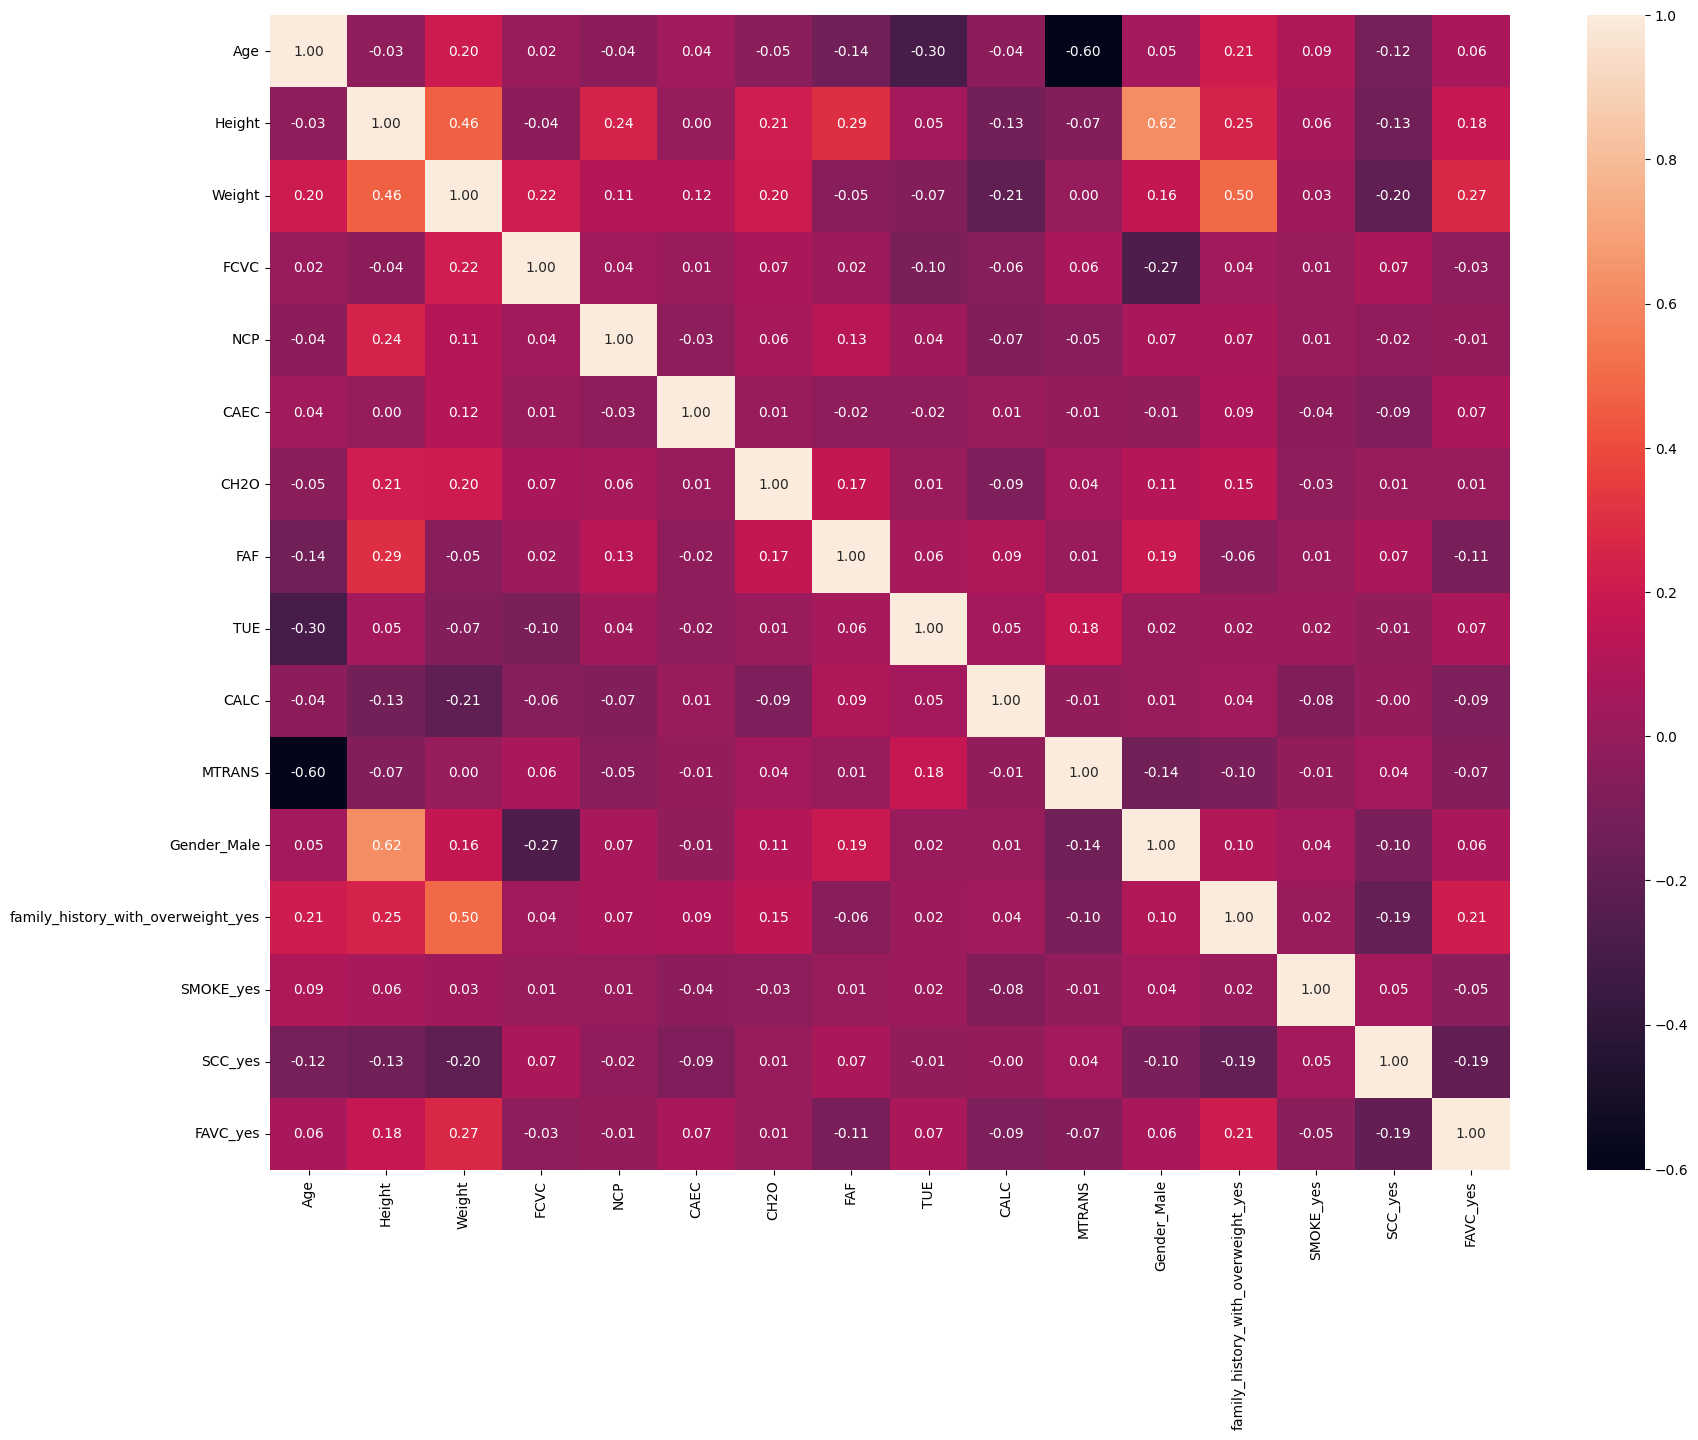

In [ ]:
fig, ax = plt.subplots(figsize = (20, 15))

sns.heatmap(data.corr(), annot=True, fmt = '.2f')

#CLUSTERING

Vamos a ver en clustering, los algoritmos de KMeans, DBSCAN y Propagación de afinidad.


##K-MEANS

In [ ]:
# Create a KMeans object
X = data.iloc[:,:].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS(k)")
plt.show()

NameError: name 'X' is not defined

In [ ]:
kmeans = KMeans(n_clusters = 3, init="k-means++", n_init = 10, max_iter = 300, random_state = 0)
kmeans = kmeans.fit_predict(X)
for i in range(100):
    print("Elemento", i+1, ":", kmeans[i])


Elemento 1 : 2
Elemento 2 : 2
Elemento 3 : 0
Elemento 4 : 0
Elemento 5 : 0
Elemento 6 : 2
Elemento 7 : 2
Elemento 8 : 2
Elemento 9 : 2
Elemento 10 : 2
Elemento 11 : 1
Elemento 12 : 0
Elemento 13 : 2
Elemento 14 : 0
Elemento 15 : 2
Elemento 16 : 2
Elemento 17 : 1
Elemento 18 : 0
Elemento 19 : 0
Elemento 20 : 2
Elemento 21 : 0
Elemento 22 : 0
Elemento 23 : 2
Elemento 24 : 0
Elemento 25 : 2
Elemento 26 : 2
Elemento 27 : 2
Elemento 28 : 2
Elemento 29 : 0
Elemento 30 : 0
Elemento 31 : 0
Elemento 32 : 2
Elemento 33 : 0
Elemento 34 : 0
Elemento 35 : 2
Elemento 36 : 2
Elemento 37 : 2
Elemento 38 : 2
Elemento 39 : 2
Elemento 40 : 0
Elemento 41 : 0
Elemento 42 : 2
Elemento 43 : 2
Elemento 44 : 2
Elemento 45 : 0
Elemento 46 : 2
Elemento 47 : 0
Elemento 48 : 0
Elemento 49 : 2
Elemento 50 : 2
Elemento 51 : 2
Elemento 52 : 2
Elemento 53 : 2
Elemento 54 : 2
Elemento 55 : 2
Elemento 56 : 2
Elemento 57 : 0
Elemento 58 : 2
Elemento 59 : 2
Elemento 60 : 2
Elemento 61 : 2
Elemento 62 : 2
Elemento 63 : 2
E

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
PCA = pca.transform(X)

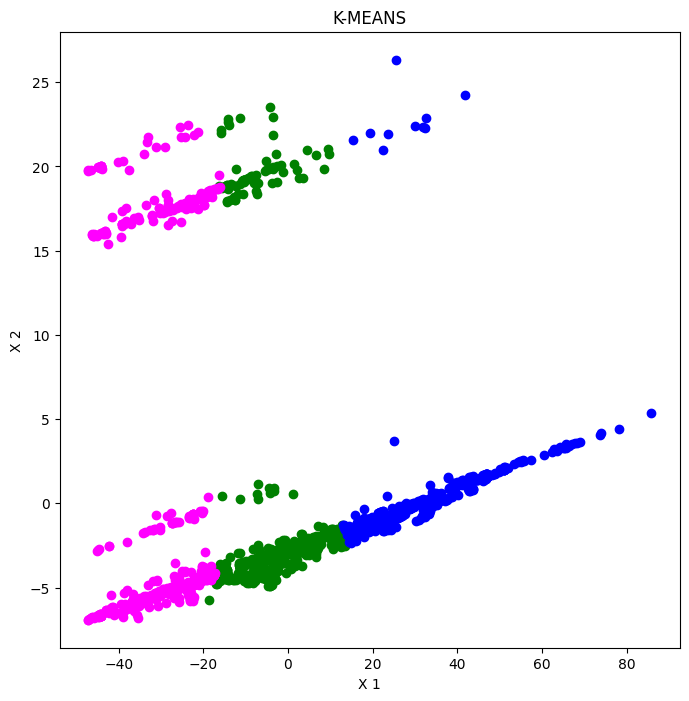

In [ ]:
plt.figure(figsize=(8,8))

plt.scatter(PCA[kmeans == 0, 0], PCA[kmeans == 0, 1], c = "green")
plt.scatter(PCA[kmeans == 1, 0], PCA[kmeans == 1, 1],  c = "blue")
plt.scatter(PCA[kmeans == 2, 0], PCA[kmeans == 2, 1],  c = "magenta")

plt.title("K-MEANS")
plt.xlabel("X 1")
plt.ylabel("X 2")
plt.show()

In [ ]:
print ( "Number of trees included in the green cluster = %i" %len(X[kmeans == 0, 0]))
print ( "Number of trees included in the blue cluster = %i" %len(X[kmeans == 1, 0]))
print ( "Number of trees included in the magenta cluster = %i" %len(X[kmeans == 2, 0]))


Number of trees included in the green cluster = 771
Number of trees included in the blue cluster = 722
Number of trees included in the magenta cluster = 618


probé con 5 clusters y con 4, pero me daban datos más dispares.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silueta_km = silhouette_score(X, kmeans)
davies_bouldin_km = davies_bouldin_score(X, kmeans)
print(silueta_km)
print(davies_bouldin_km)


0.42092312788935604
0.915578330360106


Como se puede observar, la silueta me da un valor más cercano a 0 que a 1, esto quiere decir que las muestras están en o muy cerca del límite de decisión entre dos clústeres. El bouldin me da un valor cercano a 0, por lo que nos sugiere que los clústeres tienen una buena calidad en términos de separación y densidad. En general, una silueta de 0.412 y un índice de Bouldin de 0.932 son valores que sugieren una separación razonable de los clústeres, aunque no son excelentes. Pero se saca mejores conclusiones haciendo comparativas con otros modelos y no dando por hecho que estos valores son buenos o malos, ya que la interpretación de estos valores puede variar dependiendo del dominio del problema y la naturaleza de los datos.

##DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Identificar Clusters
clusters = DBSCAN(eps=20, min_samples=25).fit_predict(X)
print(clusters)

[ 0 -1  0 ...  1  1  1]


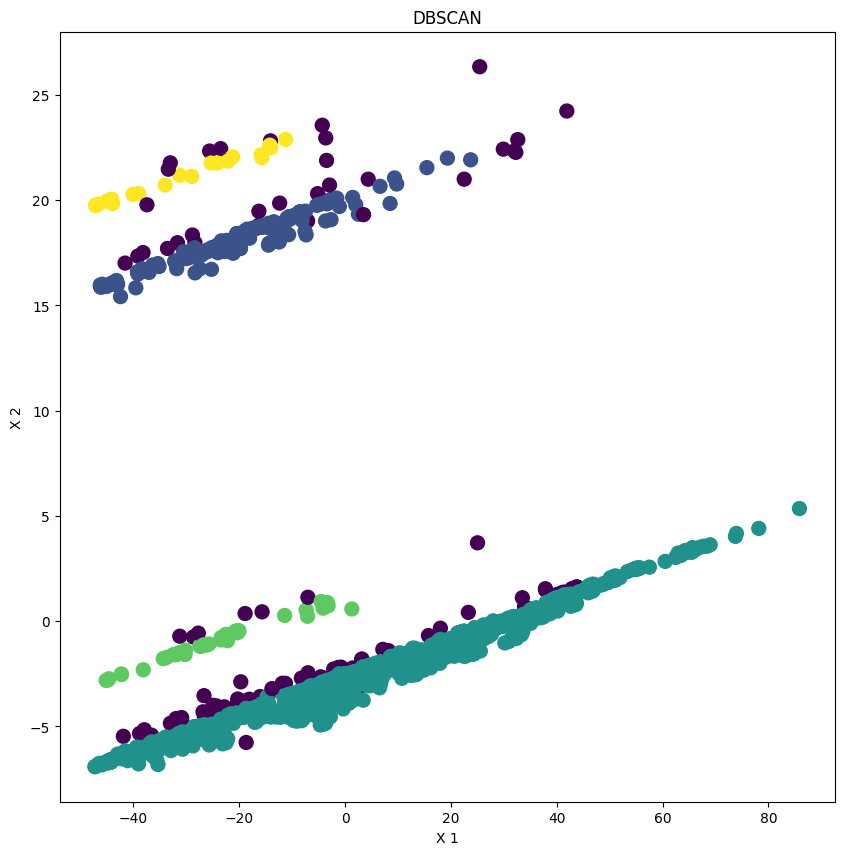

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(PCA[:, 0], PCA[:, 1], c=clusters, s=100)

plt.title("DBSCAN")
plt.xlabel("X 1")
plt.ylabel("X 2")
plt.show()

In [ ]:
unique_clusters, counts = np.unique(clusters, return_counts=True)

for cluster, count in zip(unique_clusters, counts):
    print("Cluster", cluster, ":", count, "datos")

Cluster -1 : 103 datos
Cluster 0 : 186 datos
Cluster 1 : 1743 datos
Cluster 2 : 51 datos
Cluster 3 : 28 datos


In [ ]:
silueta_dbs = silhouette_score(data, clusters)
davies_bouldin_dbs = davies_bouldin_score(data, clusters)
print(silueta_dbs)
print(davies_bouldin_dbs)

0.17084710230877206
1.9881611543667632


Gráficamente se puede observar como los clusters están claramente diferenciados y no se mezclan entre ellos. Pero la silueta y el bouldin me dan unos valores un tanto peores. Pero en este caso me voy a fiar más de la visialización, puesto que las métricas se basan también en la densidad que hay en cada cluster. En este caso no me importa mucho, ya que como no se sabe bien la selección de las personas al hacer el dataset, puede ser que eligiesen más personas de un tipo de obesidad.

##Propagación de Afinidad

In [ ]:
from sklearn.cluster import AffinityPropagation

In [ ]:
clusters_ap = AffinityPropagation(random_state=1)
clusters_ap.fit_predict(X)
print(clusters_ap)

AffinityPropagation(random_state=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


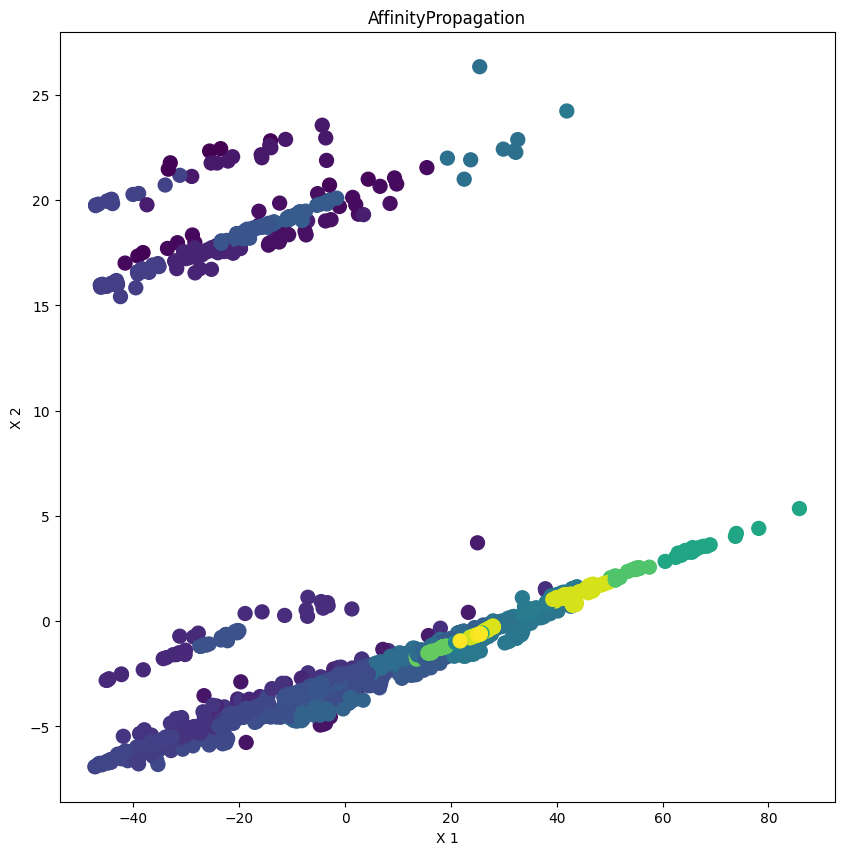

In [ ]:
plt.figure(figsize=(10,10))
labels = clusters_ap.labels_
plt.scatter(PCA[:, 0], PCA[:, 1], c=labels, s=100)

plt.title("AffinityPropagation")
plt.xlabel("X 1")
plt.ylabel("X 2")
plt.show()

In [ ]:
from collections import Counter

# Obtener los índices de los centros de los clusters
centroids_indices = clusters_ap.cluster_centers_indices_

# Contar el número de datos por cluster
cluster_counts = Counter(labels)

# Imprimir el número de datos por cluster
for centroid_index, count in cluster_counts.items():
    print("Cluster", centroid_index, ":", count, "datos")

Cluster 14 : 42 datos
Cluster 1 : 3 datos
Cluster 40 : 34 datos
Cluster 4 : 7 datos
Cluster 25 : 65 datos
Cluster 26 : 42 datos
Cluster 30 : 121 datos
Cluster 41 : 9 datos
Cluster 18 : 9 datos
Cluster 39 : 49 datos
Cluster 21 : 94 datos
Cluster 0 : 4 datos
Cluster 108 : 89 datos
Cluster 34 : 50 datos
Cluster 15 : 10 datos
Cluster 37 : 45 datos
Cluster 12 : 3 datos
Cluster 38 : 124 datos
Cluster 6 : 15 datos
Cluster 16 : 16 datos
Cluster 27 : 87 datos
Cluster 32 : 108 datos
Cluster 35 : 98 datos
Cluster 29 : 52 datos
Cluster 28 : 18 datos
Cluster 3 : 6 datos
Cluster 20 : 13 datos
Cluster 10 : 5 datos
Cluster 9 : 12 datos
Cluster 33 : 65 datos
Cluster 36 : 28 datos
Cluster 2 : 2 datos
Cluster 44 : 71 datos
Cluster 5 : 3 datos
Cluster 50 : 73 datos
Cluster 7 : 6 datos
Cluster 55 : 32 datos
Cluster 22 : 16 datos
Cluster 31 : 21 datos
Cluster 8 : 3 datos
Cluster 58 : 14 datos
Cluster 57 : 16 datos
Cluster 51 : 10 datos
Cluster 54 : 44 datos
Cluster 52 : 8 datos
Cluster 11 : 1 datos
Cluster 

In [ ]:
silueta_ap = silhouette_score(X, labels)
davies_bouldin_ap = davies_bouldin_score(X, labels)
print(silueta_ap)
print(davies_bouldin_ap)

0.33866388482646026
0.7207242721230198


#Market Basket

In [ ]:
# Importamos el csv
ruta = '/content/drive/MyDrive/CSVs/Online_Retail.csv'
df = pd.read_csv(ruta,
                 header=0,
                 sep=",",
                 decimal=".",
                 quotechar="\"",
                 encoding='latin1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [ ]:
# Disminuir registros
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')
df = df.dropna(subset=['InvoiceNo'])
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df = df[df['InvoiceNo'] < 536565]

<ipython-input-43-632393aa8adf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceNo'] = df['InvoiceNo'].astype(int)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [ ]:
df['Description'].fillna('UNKNOWN', inplace=True)

grouped_descriptions = df.groupby('InvoiceNo')['Description'].apply(list)

# Crear un array multidimensional a partir de las listas de descripciones
dataset = grouped_descriptions.values.tolist()

# Mostrar el dataset resultante
print(dataset)

[['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD'], ['ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN', 'PANDA AND BUNNIES STICKER SHEET', 'STARS GIFT TAPE ', 'INFLATABLE POLITICAL GLOBE '

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
dty = pd.DataFrame(te_ary, columns=te.columns_)
dty

,4 PURPLE FLOCK DINNER CANDLES,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 DAISY PEGS IN WOOD BOX,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,...,WRAP COWBOYS,WRAP RED APPLES,YELLOW BREAKFAST CUP AND SAUCER,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
apriori(dty, min_support=0.06)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.076923,(1)
1,0.076923,(68)
2,0.067308,(222)
3,0.086538,(427)
4,0.096154,(428)
5,0.105769,(430)
6,0.105769,(431)
7,0.105769,(432)
8,0.067308,(450)
9,0.076923,(464)


In [ ]:
frequent_itemsets = apriori(dty, min_support=0.06, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.076923,( SET 2 TEA TOWELS I LOVE LONDON ),1
1,0.076923,(ASSORTED COLOUR BIRD ORNAMENT),1
2,0.067308,(CHRISTMAS LIGHTS 10 REINDEER),1
3,0.086538,(HAND WARMER BIRD DESIGN),1
4,0.096154,(HAND WARMER OWL DESIGN),1
5,0.105769,(HAND WARMER RED RETROSPOT),1
6,0.105769,(HAND WARMER SCOTTY DOG DESIGN),1
7,0.105769,(HAND WARMER UNION JACK),1
8,0.067308,(HEART OF WICKER SMALL),1
9,0.076923,(HOMEMADE JAM SCENTED CANDLES),1


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.07) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
31,0.076923,"(HAND WARMER OWL DESIGN, HAND WARMER SCOTTY DO...",2


#Detección de anomalías

In [ ]:
from sklearn.ensemble import IsolationForest

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Pl

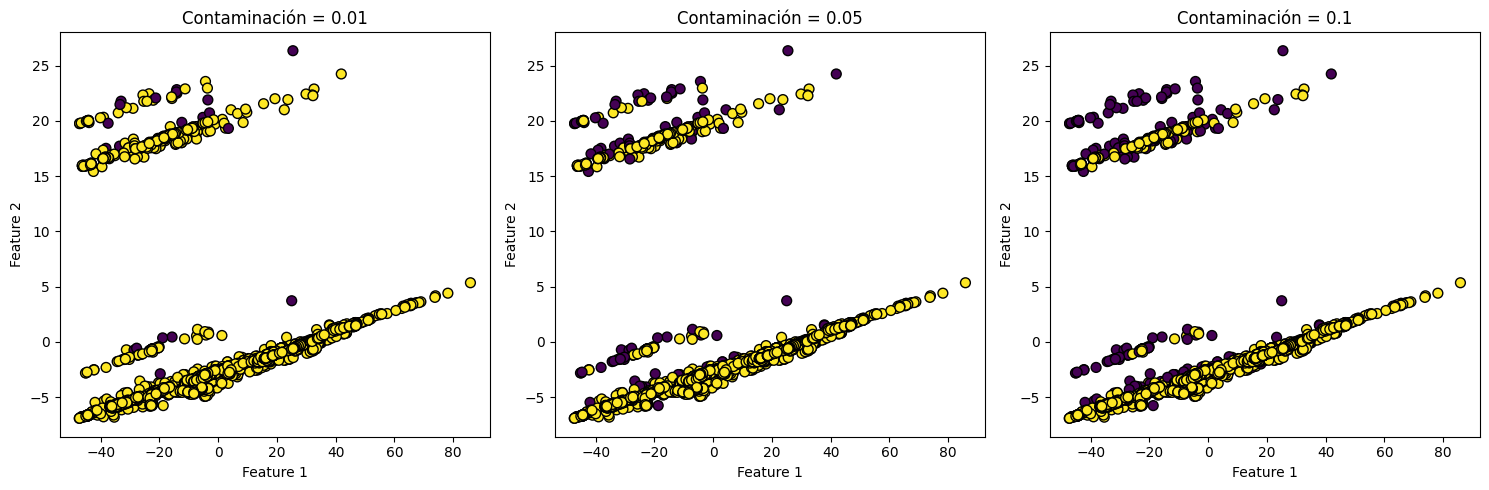

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


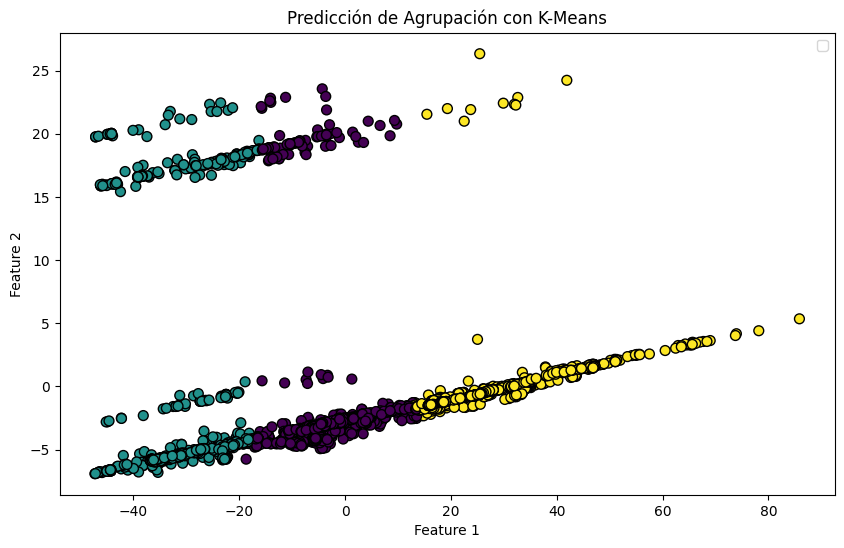

In [ ]:
contaminations = [0.01, 0.05, 0.1]  # Diferentes niveles de contaminación
plt.figure(figsize=(15, 5))

for i, contamination in enumerate(contaminations, 1):
    plt.subplot(1, len(contaminations), i)

    clf = IsolationForest(contamination=contamination, random_state=1)
    y_pred = clf.fit_predict(data)

    plt.scatter(PCA[:, 0], PCA[:, 1], c=y_pred, cmap='viridis', s=50, edgecolors='k')
    plt.title(f'Contaminación = {contamination}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Predicción de agrupación con K-Means
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data)

# Mostrar resultados de agrupación
plt.figure(figsize=(10, 6))

plt.scatter(PCA[:, 0], PCA[:, 1], c=kmeans.labels_, cmap='viridis', s=50, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicción de Agrupación con K-Means')
plt.legend()

plt.show()